<a href="https://colab.research.google.com/github/tamilmech/tamilselvan/blob/main/ML_by_CODEBASICS_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model  import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
df.columns


Index(['year', 'per capita income (US$)'], dtype='object')

In [ ]:
df = df.rename(columns={'per capita income (US$)':'income'})
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


<Axes: xlabel='year', ylabel='income'>

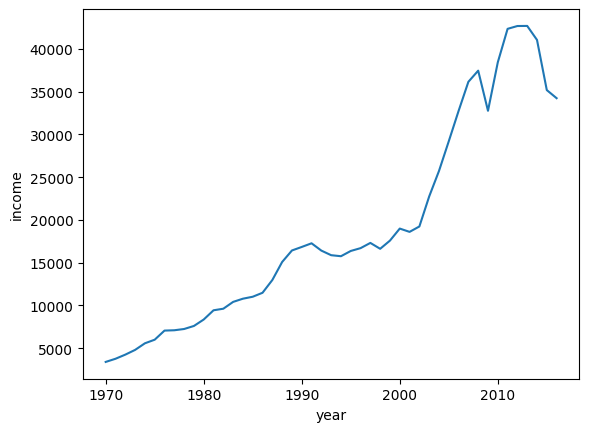

In [ ]:
sns.lineplot(x=df.year,y=df.income,data=df)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(df[['year']],df['income'])


LinearRegression()

In [ ]:
model.predict([[2024]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44602.55439531])

In [ ]:
model.coef_

array([828.46507522])

In [ ]:
model.intercept_

-1632210.7578554575

In [ ]:
years = list(range(2020, 2051))
data = {'year':years}

d =pd.DataFrame(data)
d['price']= model.predict(d[['year']])
d

,year,price
0,2020,41288.694094
1,2021,42117.159170
2,2022,42945.624245
3,2023,43774.089320
4,2024,44602.554395
5,2025,45431.019471
6,2026,46259.484546
7,2027,47087.949621
8,2028,47916.414696
9,2029,48744.879771


<Axes: xlabel='year', ylabel='price'>

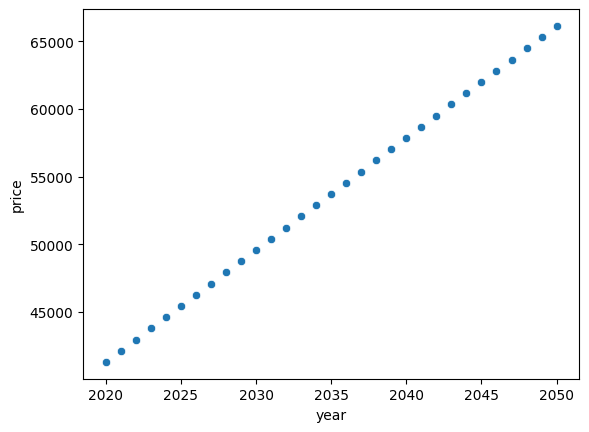

In [ ]:
sns.scatterplot(x=d['year'],y=d['price'],data=d)


# multivariate regression


Mounted at /content/drive


In [ ]:
df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hiring.csv')
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
! pip3 install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=ba27d5a510455c9a18237e132e2b58b45faa769cb0140e90a0f77ba42e56bdbf
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:

import pandas as pd
from word2number import w2n

# Function to convert words to numbers
def words_to_numbers(word):
    if pd.isna(word):
        return float('NaN')
    try:
        return w2n.word_to_num(word)
    except ValueError:
        return float('NaN')  # Return NaN if the word cannot be converted

# Apply the function to the 'experience' column
df1['experience'] = df1['experience'].apply(words_to_numbers)

df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [ ]:
df1.rename(columns={'test_score(out of 10)':'test_score(out_of_10)','interview_score(out of 10)':'interview_score(out_of_10)'})

,experience,test_score(out_of_10),interview_score(out_of_10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [ ]:
import math
def floor(x):
    return math.floor(x)

df1.experience = df1.experience.fillna(df1.experience.mean())
df1.experience =df1.experience.apply(floor)
df1.experience

0     6
1     6
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [ ]:
df1.isnull().sum()

experience                    0
test_score(out_of_10)         1
interview_score(out_of_10)    0
salary($)                     0
dtype: int64

In [ ]:
df1['test_score(out_of_10)'] =df1['test_score(out_of_10)'].fillna(df1['test_score(out_of_10)'].mean())
df1['test_score(out_of_10)']

0     8.000000
1     8.000000
2     6.000000
3    10.000000
4     9.000000
5     7.000000
6     7.857143
7     7.000000
Name: test_score(out_of_10), dtype: float64

In [ ]:
df1.head()

,experience,test_score(out_of_10),interview_score(out_of_10),salary($)
0,6,8.0,9,50000
1,6,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [ ]:
df1.isnull().sum()

experience                    0
test_score(out_of_10)         0
interview_score(out_of_10)    0
salary($)                     0
dtype: int64

In [ ]:
from sklearn.linear_model  import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(df1[['experience','test_score(out_of_10)','interview_score(out_of_10)']],df1['salary($)'])


LinearRegression()

In [ ]:
model.predict([[2,9,6]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47025.70756135])

In [ ]:
model.coef_

array([2823.76559304, 1329.00027432, 2929.14459978])

In [ ]:
model.intercept_

11842.306307731225

# Save Model Using Joblib And Pickle

## pickle

In [ ]:
import pickle
# dump model as a file and store in local
with open('my_multi_model','wb') as f:
    pickle.dump(model,f)

In [ ]:
# load a file and use model

with open('my_multi_model','rb') as f:
    load_model = pickle.load(f)

In [ ]:
# using the model

load_model.predict([[2,9,6]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47025.70756135])

## Joblib

In [ ]:
import joblib as jb

jb.dump(model,'joblib_model.pkl')



['joblib_model.pkl']

In [ ]:
jb_model = jb.load('joblib_model.pkl')



In [ ]:
jb_model.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47025.70756135])

# Label encoding

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
data = {
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Large'],
    'Price': [10, 20, 30, 15, 25, 35]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Label encoding categorical variables
label_encoder = LabelEncoder()
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])
df['Size_encoded'] = label_encoder.fit_transform(df['Size'])

# Features and target variable
X = df[['Color_encoded', 'Size_encoded']]
y = df['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
y_pred

Mean Squared Error: 25.69444444444442


array([15.83333333, 24.16666667])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [ ]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [ ]:
df = df.rename(columns={'Car Model':'Car_Model','Sell Price($)':'Sell_Price($)'})
df.columns

Index(['Car_Model', 'Mileage', 'Sell_Price($)', 'Age(yrs)'], dtype='object')

In [ ]:
enco = LabelEncoder()


In [ ]:
df['enco_Car_Model'] = enco.fit_transform(df['Car_Model'])
df

,Car_Model,Mileage,Sell_Price($),Age(yrs),enco_Car_Model
0,BMW X5,69000,18000,6,1
1,BMW X5,35000,34000,3,1
2,BMW X5,57000,26100,5,1
3,BMW X5,22500,40000,2,1
4,BMW X5,46000,31500,4,1
5,Audi A5,59000,29400,5,0
6,Audi A5,52000,32000,5,0
7,Audi A5,72000,19300,6,0
8,Audi A5,91000,12000,8,0
9,Mercedez Benz C class,67000,22000,6,2


In [ ]:
df.Car_Model.sort_values()

5                   Audi A5
6                   Audi A5
7                   Audi A5
8                   Audi A5
0                    BMW X5
1                    BMW X5
2                    BMW X5
3                    BMW X5
4                    BMW X5
9     Mercedez Benz C class
10    Mercedez Benz C class
11    Mercedez Benz C class
12    Mercedez Benz C class
Name: Car_Model, dtype: object

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(df[['enco_Car_Model','Mileage','Age(yrs)']],df['Sell_Price($)'])

LinearRegression()

In [ ]:
pred = model.predict([[0,52000,5]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28502.52969256])

In [ ]:
model.score(df[['enco_Car_Model','Mileage','Age(yrs)']],df['Sell_Price($)'])

0.8719970367825953

# Training and Testing Data

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/carprices.csv')
df = df.drop(columns='Car Model',axis=1)
df.head()

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4


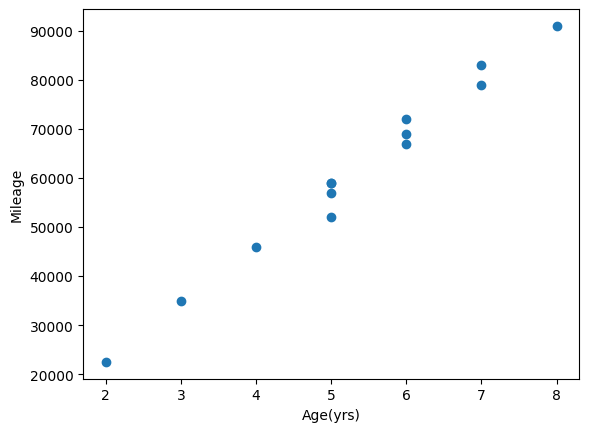

In [ ]:
# @title Age vs Mileage

import matplotlib.pyplot as plt
plt.scatter(df['Age(yrs)'], df['Mileage'])
plt.xlabel('Age(yrs)')
_ = plt.ylabel('Mileage')

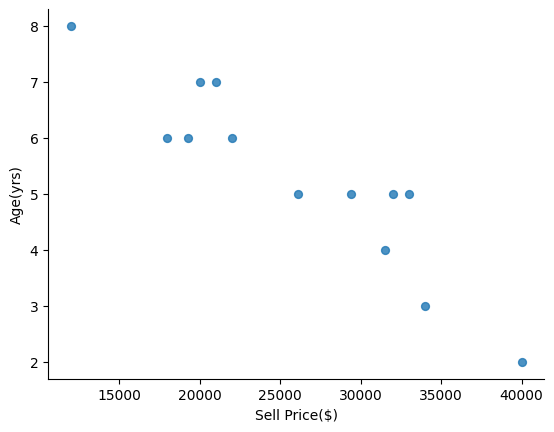

In [ ]:
# @title Sell Price($) vs Age(yrs)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sell Price($)', y='Age(yrs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['Mileage','Age(yrs)']],df['Sell Price($)'],test_size=0.2)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.predict(xtest)

array([41295.95407326, 27591.90814653, 26677.52870421])

In [ ]:
model.score(xtest,ytest)

0.892715001888824

In [ ]:
model.predict([[35000,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36960.41552761])

# Logestic regression

In [ ]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['age']],df['bought_insurance'],test_size=0.9)


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(xtrain,ytrain)


LogisticRegression()

In [ ]:
model.predict(xtest)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [ ]:
model.predict([[22]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.score(xtest,ytest)

0.84

# Logistic Regression (Multiclass Classification)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target labels (y)
X = iris.data
y = iris.target

model = LogisticRegression()
model.fit(iris.data,iris.target)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X = iris.data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
model.predict([[6.7, 3. , 5.2, 2.3]])

array([2])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df.head()
df = df.dropna(axis=0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.head()




,Survived,Pclass,Sex,Age,Fare
1,1,1,female,38.0,71.2833
3,1,1,female,35.0,53.1000
6,0,1,male,54.0,51.8625
10,1,3,female,4.0,16.7000
11,1,1,female,58.0,26.5500


In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
df['lbl_sex'] = lbl.fit_transform(df['Sex'])
df.drop(columns='Sex',axis=0)

NameError: name 'df' is not defined

In [ ]:
x = df[['Pclass','Age','Fare','lbl_sex']]
y= df['Survived']


KeyboardInterrupt: 

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)


In [ ]:
model = DecisionTreeClassifier()


In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
model.predict([[1,38,71,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# SVM


[git docs](https://github.com/codebasics/py/blob/master/ML/10_svm/10_svm.ipynb)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

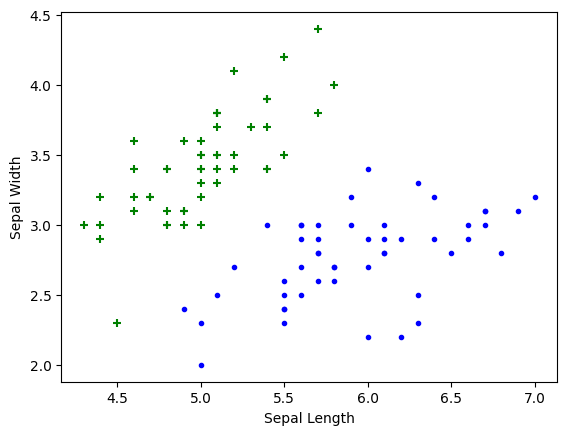

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:

len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#1. Regularization (C)

model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [ ]:
#2. Gamma

model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

In [ ]:
#Kernel

model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

1.0

In [ ]:
##### practice dataset
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Access the features (data) and target labels
data = digits.data
target = digits.target

# Optionally, you can also access other attributes like DESCR for description,
# images for image data, etc.
data.shape

(1797, 64)

In [ ]:
x = data
y = target
from  sklearn.svm import SVC
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
model = SVC()

In [ ]:
model.fit(xtrain,ytrain)

SVC()

In [ ]:
model.predict(xtest)

array([5, 6, 7, 1, 7, 0, 0, 9, 3, 6, 1, 5, 8, 6, 8, 2, 3, 6, 4, 0, 9, 7,
       8, 3, 3, 5, 0, 5, 4, 7, 0, 9, 6, 9, 1, 3, 8, 7, 4, 2, 4, 0, 2, 9,
       0, 3, 6, 5, 9, 1, 1, 8, 7, 6, 6, 3, 0, 8, 1, 4, 5, 8, 1, 9, 9, 7,
       5, 5, 4, 4, 1, 0, 3, 1, 1, 9, 9, 4, 2, 1, 3, 0, 7, 9, 6, 3, 7, 3,
       0, 1, 3, 3, 3, 4, 7, 0, 5, 8, 4, 9, 3, 1, 7, 9, 2, 8, 9, 3, 2, 6,
       1, 0, 8, 5, 8, 3, 4, 3, 4, 6, 6, 2, 7, 6, 0, 2, 4, 0, 7, 8, 4, 7,
       4, 5, 0, 0, 4, 0, 9, 9, 2, 0, 4, 1, 7, 6, 3, 4, 0, 3, 8, 3, 5, 2,
       5, 3, 0, 6, 5, 3, 9, 3, 4, 4, 0, 2, 4, 0, 2, 8, 4, 6, 5, 1, 2, 4,
       7, 1, 9, 0, 6, 7, 0, 8, 8, 2, 7, 4, 9, 0, 1, 4, 5, 8, 6, 5, 8, 3,
       3, 7, 2, 5, 9, 6, 3, 6, 7, 5, 4, 9, 0, 5, 2, 0, 2, 6, 8, 3, 9, 3,
       3, 8, 9, 3, 2, 0, 4, 5, 4, 4, 2, 1, 4, 7, 4, 0, 0, 9, 9, 7, 7, 6,
       9, 2, 6, 8, 5, 8, 3, 8, 8, 2, 6, 7, 1, 5, 4, 7, 5, 7, 9, 1, 5, 8,
       7, 1, 5, 9, 5, 1, 1, 2, 6, 5, 8, 1, 4, 9, 2, 6, 1, 2, 8, 1, 4, 2,
       5, 5, 7, 4, 8, 6, 7, 6, 3, 6, 5, 9, 1, 5, 6,

In [ ]:
model.score(xtest,ytest)

0.9861111111111112

#  Random Forest

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
# Load the digits dataset
digits = load_digits()

# Access the features (data) and target labels
data = digits.data
target = digits.target

# Optionally, you can also access other attributes like DESCR for description,
# images for image data, etc.
xtrain,xtest,ytrain,ytest = train_test_split(data,target,test_size=0.2)


In [ ]:
model = RandomForestClassifier(n_estimators=150)

In [ ]:
model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=150)

In [ ]:
model.score(xtest,ytest)

0.9638888888888889

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)

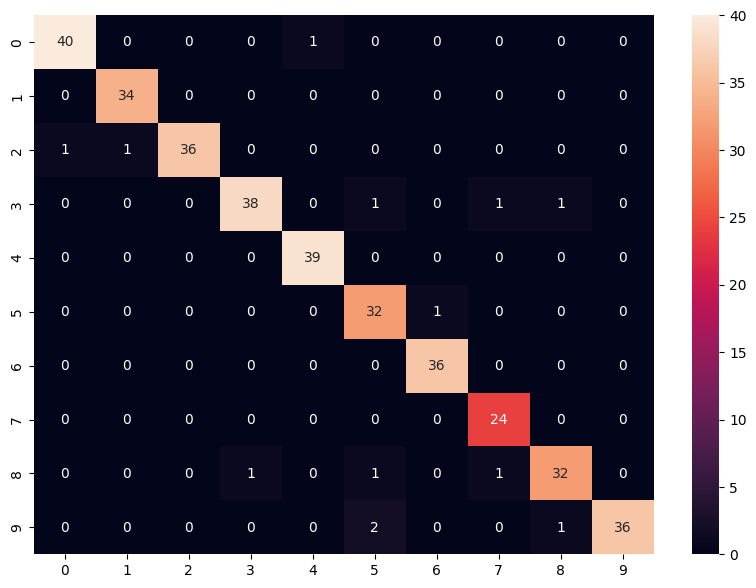

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.xlabel('ytest')
plt.ylabel('ypred')
sns.heatmap(cm,annot=True)
plt.show()

# K fold

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
data = digits.data
target = digits.target

# Define the number of folds
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=5)

# Initialize a list to store accuracies
accuracies = []

# Iterate over each fold
for train_index, test_index in kf.split(data):
    # Split the data into train and test sets
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Initialize and train a classifier (e.g., Support Vector Machine)
    clf = SVC()
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy:", average_accuracy)


Average accuracy: 0.9660631383472609


In [ ]:
#### with linear regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Assume you have your lathe dataset loaded into lathe_data (features) and lathe_target (target labels)

# Sample Lathe dataset
lathe_data = np.random.rand(100, 10)  # Assuming 100 samples with 10 features
lathe_target = np.random.randint(2, size=100)  # Binary classification, random target labels

# Define number of folds for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits)

# Initialize lists to store accuracies
linear_regression_accuracies = []
svm_accuracies = []

# Iterate over each fold
for train_index, test_index in kf.split(lathe_data):
    # Split the data into train and test sets
    X_train, X_test = lathe_data[train_index], lathe_data[test_index]
    y_train, y_test = lathe_target[train_index], lathe_target[test_index]

    # Train Linear Regression model
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lr = np.round(linear_reg_model.predict(X_test))

    # Calculate accuracy and append to the list
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    linear_regression_accuracies.append(lr_accuracy)

    # Train SVM model
    svm_model = SVC(kernel='linear')  # Linear kernel
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_svm = svm_model.predict(X_test)

    # Calculate accuracy and append to the list
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(svm_accuracy)

# Calculate the average accuracy for each model
average_lr_accuracy = np.mean(linear_regression_accuracies)
average_svm_accuracy = np.mean(svm_accuracies)

print("Average Linear Regression accuracy:", average_lr_accuracy)
print("Average SVM accuracy:", average_svm_accuracy)


Average Linear Regression accuracy: 0.6300000000000001
Average SVM accuracy: 0.61


# K-means

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

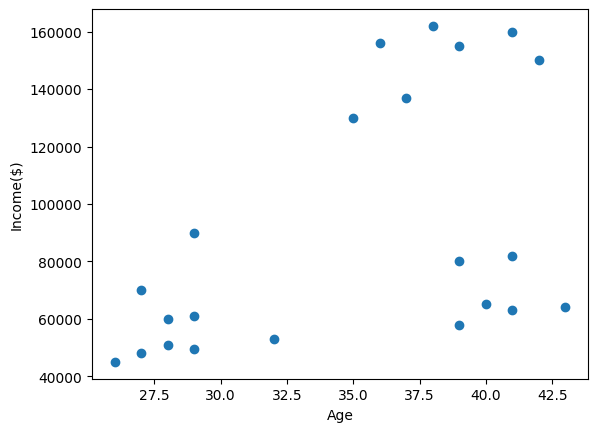

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

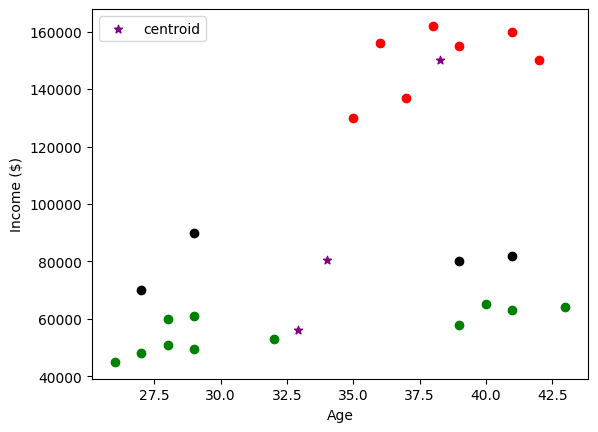

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


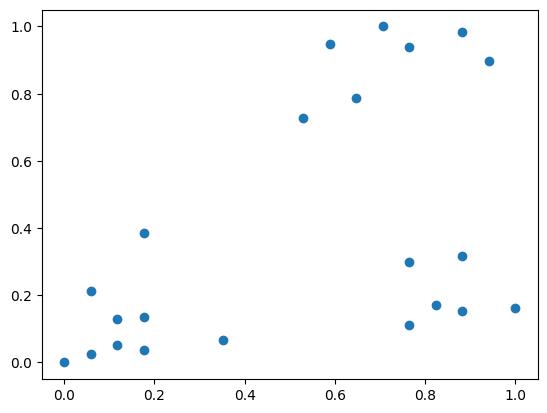

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

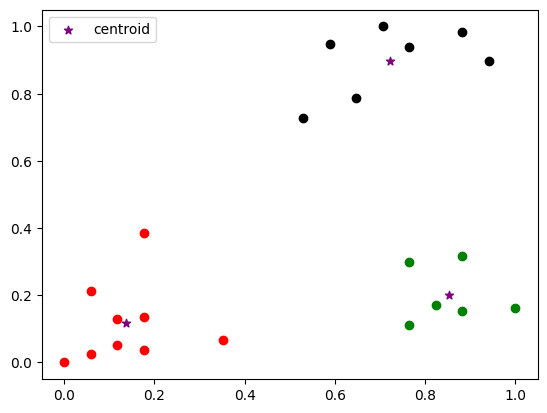

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

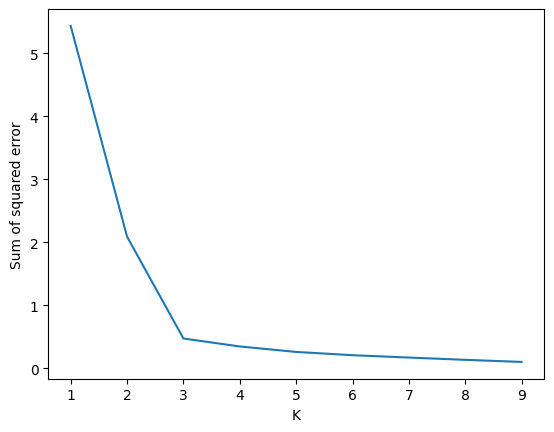

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Naive Bayes Classifier Algorithm Part 1

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:

model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.7686567164179104

In [ ]:

X_test[0:10]

,Pclass,Age,Fare,female
334,1,29.699118,133.6500,1
613,3,29.699118,7.7500,0
758,3,34.000000,8.0500,0
31,1,29.699118,146.5208,1
878,3,29.699118,7.8958,0
374,3,3.000000,21.0750,1
484,1,25.000000,91.0792,0
155,1,51.000000,61.3792,0
351,1,29.699118,35.0000,0
628,3,26.000000,7.8958,0


In [ ]:
y_test[0:10]

334    1
613    0
758    0
31     1
878    0
374    0
484    1
155    0
351    0
628    0
Name: Survived, dtype: int64

In [ ]:

model.predict(X_test[0:10])

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:

model.predict_proba(X_test[:10])

array([[4.51729327e-05, 9.99954827e-01],
       [9.69740024e-01, 3.02599759e-02],
       [9.70791306e-01, 2.92086936e-02],
       [7.26154065e-06, 9.99992738e-01],
       [9.69774706e-01, 3.02252944e-02],
       [2.95135054e-01, 7.04864946e-01],
       [1.13126205e-01, 8.86873795e-01],
       [4.74092380e-01, 5.25907620e-01],
       [7.46451093e-01, 2.53548907e-01],
       [9.68012853e-01, 3.19871474e-02]])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train)

array([0.752     , 0.768     , 0.736     , 0.81451613, 0.76612903])

# Naive Bayes Classifier Algorithm

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
emails = [

    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9856424982053122

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.9856424982053122

In [ ]:
clf.predict(emails)

array([0, 1])

In [ ]:
##########
from sklearn import datasets
wine = datasets.load_wine()


wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size=0.30)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

gnb = GaussianNB()
gnb.fit(xtrain,ytrain)


GaussianNB()

In [ ]:
predgnb = gnb.predict(xtest)

gnb.score(xtest,ytest)

0.9814814814814815

In [ ]:
##
mnb = MultinomialNB()

In [ ]:
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [ ]:
mnb.score(xtest,ytest)

0.9074074074074074

# Hyper parameter Tuning (GridSearchCV)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
clf = GridSearchCV(SVC(gamma='auto'),{
    'C':[10,20,30],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)


In [16]:
clf.fit(iris.data,iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [10, 20, 30], 'kernel': ['rbf', 'linear']})

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00186439, 0.00149531, 0.00162935, 0.00141945, 0.00162778,
        0.00136046]),
 'std_fit_time': array([1.46901866e-04, 5.61479348e-05, 7.70823158e-05, 3.54920631e-05,
        1.00764346e-04, 9.74923235e-04]),
 'mean_score_time': array([0.00121388, 0.00106258, 0.0010282 , 0.00096431, 0.00108705,
        0.00057263]),
 'std_score_time': array([7.81984736e-05, 8.71356989e-05, 9.41130396e-05, 3.02814498e-05,
        1.16522611e-04, 3.62416317e-05]),
 'param_C': masked_array(data=[10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 30, 

In [7]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [18]:

print("Best Parameters:", clf.best_params_)


print("Best Estimator:", clf.best_estimator_)


print("Best Score:", clf.best_score_)


print("Test Set Score:", clf.score(X_test, y_test))

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Estimator: SVC(C=10, gamma='auto')
Best Score: 0.9800000000000001
Test Set Score: 1.0


#  L1 and L2 Regularization | Lasso, Ridge Regression

In [39]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (no regularization)
lr = Ridge(alpha=0)  # alpha=0 means no regularization, Ridge acts as a linear regression
lr.fit(X_train_scaled, y_train)
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.1)  # alpha=0.1 for L1 regularization
lasso.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# L2 Regularization (Ridge)
ridge = Ridge(alpha=0.1)  # alpha=0.1 for L2 regularization
ridge.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) for each model
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Print MSE for each model
print("Linear Regression:")
print("Train MSE (Before Regularization):", train_mse_lr)
print("Test MSE (Before Regularization):", test_mse_lr)
print("\nLasso Regression:")
print("Train MSE (After L1 Regularization):", train_mse_lasso)
print("Test MSE (After L1 Regularization):", test_mse_lasso)
print("\nRidge Regression:")
print("Train MSE (After L2 Regularization):", train_mse_ridge)
print("Test MSE (After L2 Regularization):", test_mse_ridge)



Linear Regression:
Train MSE (Before Regularization): 0.009378038203864658
Test MSE (Before Regularization): 0.010265673458293713

Lasso Regression:
Train MSE (After L1 Regularization): 0.11439345652839546
Test MSE (After L1 Regularization): 0.16569227607363898

Ridge Regression:
Train MSE (After L2 Regularization): 0.05996693267232972
Test MSE (After L2 Regularization): 0.11455268509811374


# KNN


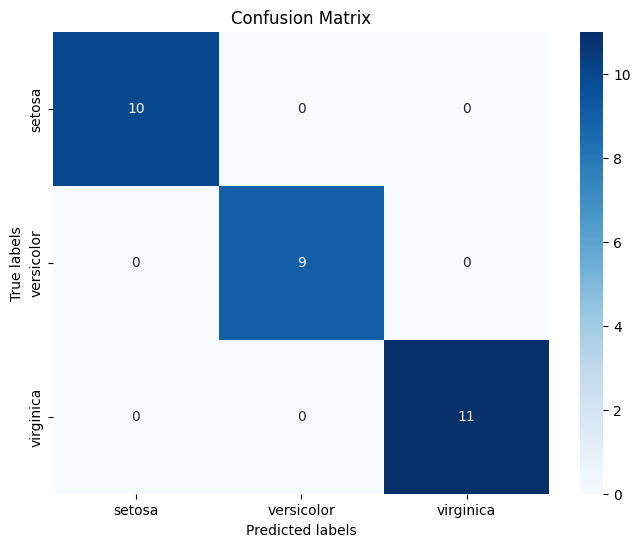

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# principal component analysis
Let's say you have a dataset with many features (e.g., height, weight, age, income, etc.) and you want to reduce the dimensionality while retaining as much information as possible